# Mental Health Risk Prediction in the Tech Industry

**Project Goal:** The objective of this project is to analyze the "Mental Health in Tech Survey" dataset to identify key factors that correlate with seeking treatment for mental health conditions. We will build and evaluate several machine learning models to predict whether an individual in the tech industry is likely to seek treatment.

**Methodology:**
1.  **Data Exploration & Visualization (EDA):** Understand the dataset's structure and find initial insights.
2.  **Data Cleaning & Preprocessing:** Handle missing values and prepare the data for modeling.
3.  **Model Building & Comparison:** Train several classification models to establish a baseline performance.
4.  **Hyperparameter Tuning:** Fine-tune the best-performing model to improve its accuracy.
5.  **Final Evaluation:** Assess the final model using various metrics like Accuracy, Precision, Recall, F1-Score, and the ROC-AUC curve.

In [1]:
# Core libraries for data handling and numerical operations
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools for preprocessing and pipeline creation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Models for comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation Metrics to judge model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# To save our final model
import joblib
import os

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Define the path to our dataset
data_path = '../data/raw_dataset.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_path)

# Display the first 5 rows to get a feel for the data
print("--- First 5 Rows of the Dataset ---")
display(df.head())

# Display a concise summary of the DataFrame
print("\n--- Dataset Info ---")
df.info()

# Display descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
display(df.describe())

--- First 5 Rows of the Dataset ---


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null 

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Exploratory Data Analysis (EDA)

In this phase, we will explore the data visually to understand the distribution of key features and their relationship with our target variable, **`treatment`**.

C:\Users\Himel\AppData\Local\Temp\ipykernel_4684\48313171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='treatment', data=df, palette='viridis')


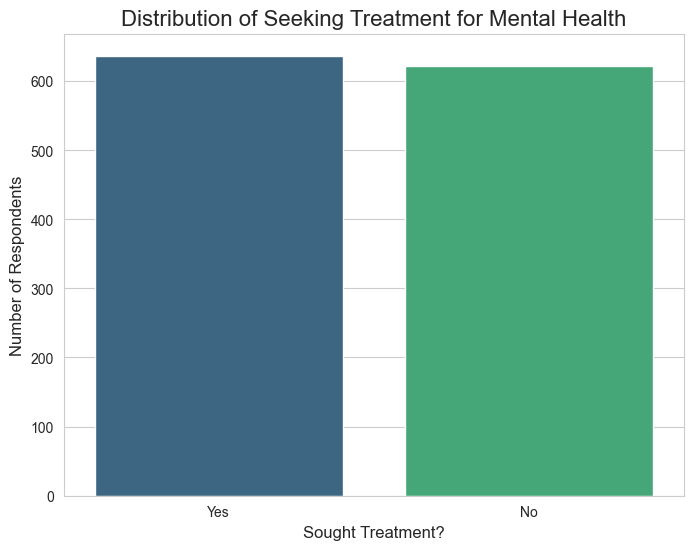

treatment
Yes    0.505957
No     0.494043
Name: proportion, dtype: float64


In [3]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of the target variable 'treatment'
plt.figure(figsize=(8, 6))
sns.countplot(x='treatment', data=df, palette='viridis')
plt.title('Distribution of Seeking Treatment for Mental Health', fontsize=16)
plt.xlabel('Sought Treatment?', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.show()

# Print the exact counts
print(df['treatment'].value_counts(normalize=True))

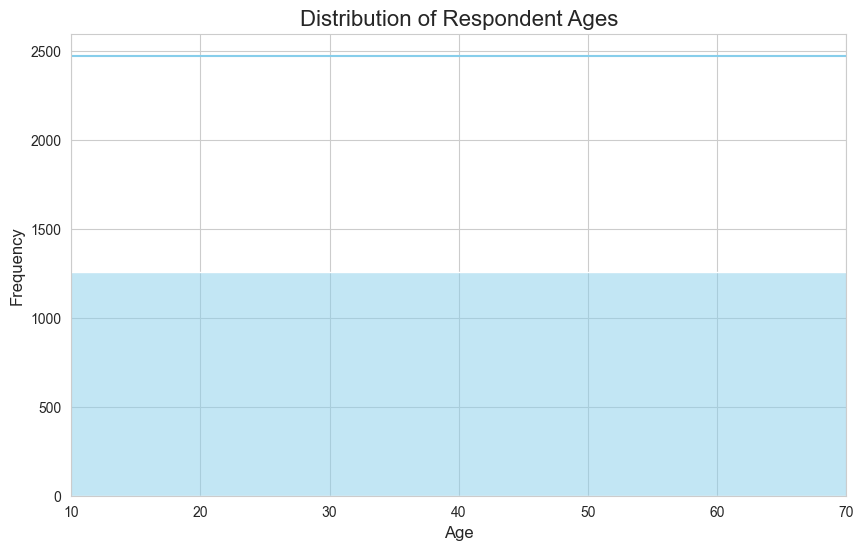

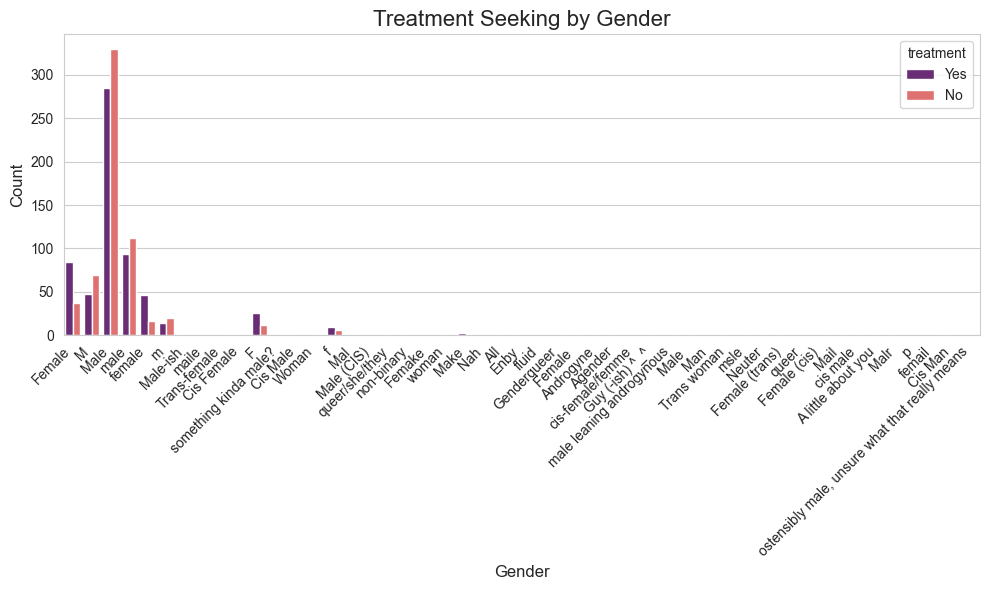

In [4]:
# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Respondent Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# We see some outliers in age, which we will handle later if needed.
plt.xlim(10, 70) # Limiting age range for better visualization
plt.show()

# Plot Gender distribution vs. Treatment
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='treatment', data=df, palette='magma')
plt.title('Treatment Seeking by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

### Data Cleaning and Preprocessing

Now, we prepare the data for our models. This involves:
1.  Dropping irrelevant columns.
2.  Cleaning the `Gender` column to be consistent.
3.  Handling missing values (`NaN`).

In [5]:
print("Shape before cleaning:", df.shape)

# Drop columns that are free-text, timestamps, or have too many unique values for this model
df_cleaned = df.drop(['Timestamp', 'Country', 'state', 'comments'], axis=1)

# --- Robust Gender Cleaning ---
# Standardize to lowercase
df_cleaned['Gender'] = df_cleaned['Gender'].str.lower()
# Define synonyms for Male and Female
male_synonyms = ['m', 'male', 'male-ish', 'maile', 'mal', 'male (cis)', 'make', 'cis male', 'man', 'msle', 'mail']
female_synonyms = ['f', 'female', 'woman', 'cis female', 'femake', 'female (cis)', 'femail', 'cis-female/femme', 'female (trans)']

# Standardize to 'Male', 'Female', or 'Other'
def standardize_gender(g):
    if g in male_synonyms:
        return 'Male'
    elif g in female_synonyms:
        return 'Female'
    else:
        return 'Other'

df_cleaned['Gender'] = df_cleaned['Gender'].apply(standardize_gender)

# For this analysis, we'll focus on Male and Female categories to maintain a strong signal
df_cleaned = df_cleaned[df_cleaned['Gender'].isin(['Male', 'Female'])]

# --- Handling Missing Values ---
# Fill missing 'self_employed' and 'work_interfere' with the mode (most frequent value)
df_cleaned['self_employed'].fillna(df_cleaned['self_employed'].mode()[0], inplace=True)
df_cleaned['work_interfere'].fillna(df_cleaned['work_interfere'].mode()[0], inplace=True)

# Drop any other rows with missing values, if any are left
df_cleaned.dropna(inplace=True)

print("Shape after cleaning:", df_cleaned.shape)
print("\nData cleaning complete. Missing values handled and columns standardized.")

Shape before cleaning: (1259, 27)
Shape after cleaning: (1233, 23)

Data cleaning complete. Missing values handled and columns standardized.


C:\Users\Himel\AppData\Local\Temp\ipykernel_4684\705828271.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['self_employed'].fillna(df_cleaned['self_employed'].mode()[0], inplace=True)
C:\Users\Himel\AppData\Local\Temp\ipykernel_4684\705828271.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

### Step 5: Feature Engineering and Pipeline Creation

To make our workflow efficient and prevent data leakage, we will create a `Pipeline`. This pipeline will automatically apply the necessary transformations to our data before feeding it to the model.

1.  **Numerical Features:** Will be scaled using `StandardScaler`.
2.  **Categorical Features:** Will be converted into numerical format using `OneHotEncoder`.

In [6]:
# Define our features (X) and target (y)
X = df_cleaned.drop('treatment', axis=1)
y = df_cleaned['treatment']

# Automatically identify numerical and categorical column names
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

# Create the preprocessing pipeline
# This bundles the transformations for both data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


In [7]:
# Split data into 80% training and 20% testing sets
# stratify=y ensures that the train and test sets have the same proportion of 'Yes'/'No' as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data split complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data split complete.
Training set shape: (986, 22)
Testing set shape: (247, 22)


### Step 6: Model Training and Baseline Comparison

We will now train four different classification models to see which one performs best on our data out-of-the-box. This will give us a performance baseline. The models are:
* Logistic Regression
* Support Vector Machine (SVM)
* Random Forest
* Gradient Boosting

In [8]:
# Define the models we want to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Loop through the models, train them, and evaluate
for name, model in models.items():
    # Create the full pipeline by combining the preprocessor and the classifier
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', model)])
    
    # Train the model on the training data
    full_pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = full_pipeline.predict(X_test)
    
    # Print the evaluation report
    print(f"--- Performance Report for: {name} ---")
    print(classification_report(y_test, y_pred))
    print("-" * 50 + "\n")

--- Performance Report for: Logistic Regression ---
              precision    recall  f1-score   support

          No       0.72      0.79      0.75       123
         Yes       0.77      0.70      0.73       124

    accuracy                           0.74       247
   macro avg       0.75      0.75      0.74       247
weighted avg       0.75      0.74      0.74       247

--------------------------------------------------

--- Performance Report for: Support Vector Machine ---
              precision    recall  f1-score   support

          No       0.73      0.80      0.76       123
         Yes       0.78      0.70      0.74       124

    accuracy                           0.75       247
   macro avg       0.76      0.75      0.75       247
weighted avg       0.76      0.75      0.75       247

--------------------------------------------------

--- Performance Report for: Random Forest ---
              precision    recall  f1-score   support

          No       0.71      0.76 

### Step 7: Hyperparameter Tuning

Our baseline results show that Random Forest is a strong performer. Now, we will fine-tune its **hyperparameters** to optimize its performance. Hyperparameters are the settings of a model that we can adjust before the training process begins.

We will use `GridSearchCV` to automatically search for the best combination of parameters from a grid we define.

In [9]:
# 1. Define the model pipeline we want to tune
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# 2. Create a "parameter grid" - a dictionary of settings to try
param_grid = {
    'classifier__n_estimators': [100, 200],         # Number of trees
    'classifier__max_depth': [10, 20, None],       # Maximum depth of the trees
    'classifier__min_samples_leaf': [1, 2, 4]      # Minimum samples required at a leaf node
}

# 3. Set up GridSearchCV
# cv=5 means 5-fold cross-validation. verbose=2 shows progress.
grid_search = GridSearchCV(estimator=rf_pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy', # We'll optimize for overall accuracy
                           n_jobs=-1,          # Use all available CPU cores
                           verbose=2)

# 4. Run the search on your training data
print("--- Starting Hyperparameter Tuning (this may take a moment)... ---")
grid_search.fit(X_train, y_train)

# 5. Print the best settings found by the search
print("\nBest parameters found: ", grid_search.best_params_)

--- Starting Hyperparameter Tuning (this may take a moment)... ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}


### Step 8: Final Tuned Model Evaluation

Now that `GridSearchCV` has found the best hyperparameters, it has automatically retrained a new, improved model on our entire training set. Let's evaluate this final, tuned model on our unseen test data to see how well it performs. We will look at:
* The Classification Report
* A Visual Confusion Matrix
* The ROC-AUC Curve

--- Final Tuned Model Performance ---
              precision    recall  f1-score   support

          No       0.73      0.80      0.77       123
         Yes       0.79      0.71      0.75       124

    accuracy                           0.76       247
   macro avg       0.76      0.76      0.76       247
weighted avg       0.76      0.76      0.76       247



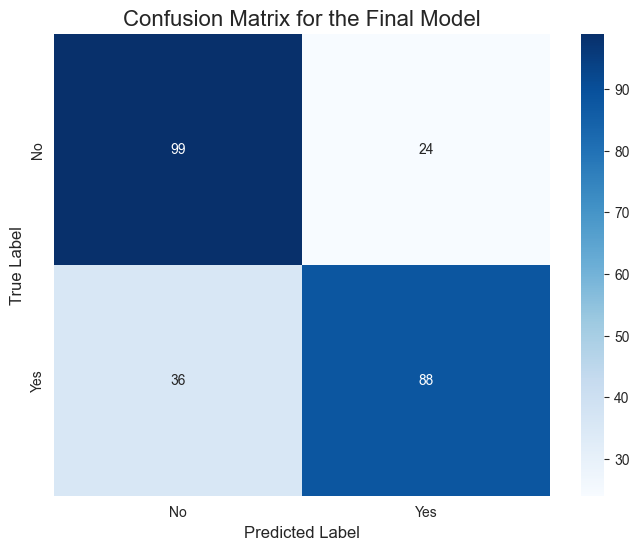

In [10]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_final = best_model.predict(X_test)

# Print the final classification report
print("--- Final Tuned Model Performance ---")
print(classification_report(y_test, y_pred_final))

# Display the confusion matrix visually
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Final Model', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

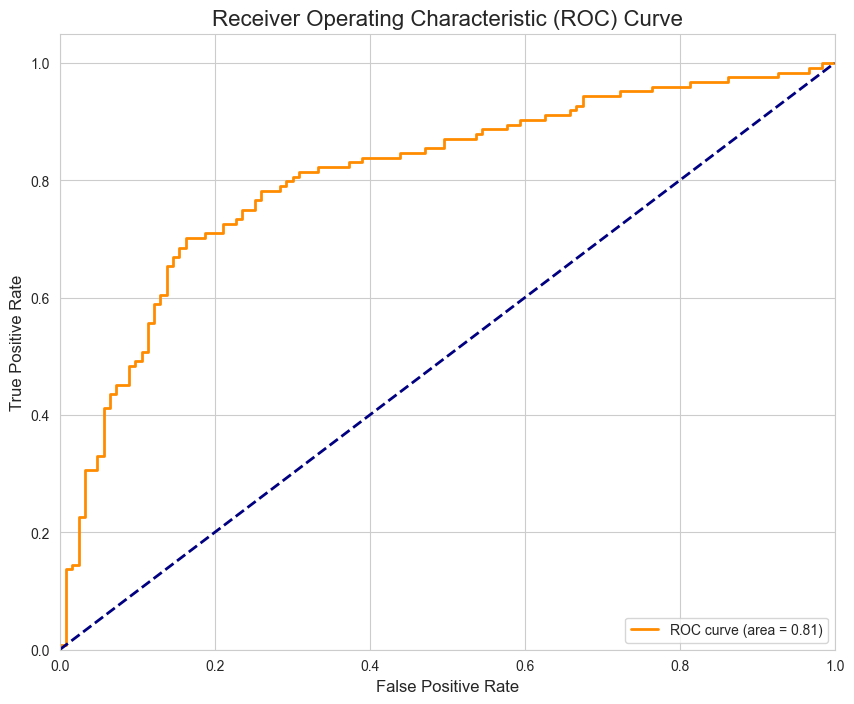

AUC Score: 0.8085


In [11]:
# Predict probabilities for the positive class ('Yes')
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='Yes')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Dashed line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

### Step 9: Feature Importance

One of the benefits of using a Random Forest model is that we can easily see which features it considered most important when making its predictions. This helps us understand the "why" behind our model's logic.

C:\Users\Himel\AppData\Local\Temp\ipykernel_4684\2722470966.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='plasma')


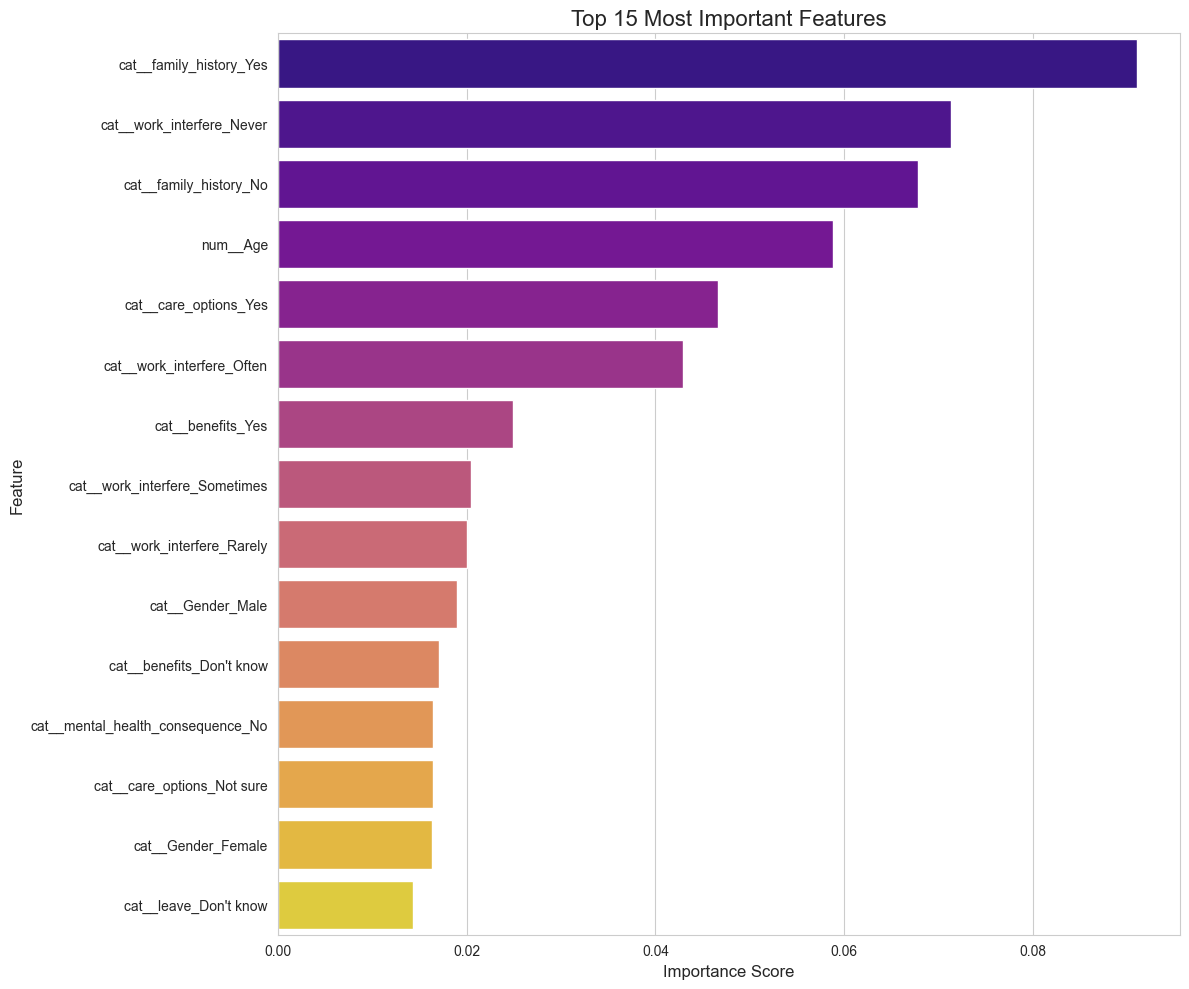

In [12]:
# Extract the trained RandomForest model and the feature names from the pipeline
model_in_pipeline = best_model.named_steps['classifier']
preprocessor_in_pipeline = best_model.named_steps['preprocessor']
feature_names = preprocessor_in_pipeline.get_feature_names_out()

# Get the importance scores
importances = model_in_pipeline.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='plasma')
plt.title('Top 15 Most Important Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

### Step 10: Saving the Final Model

We will now save our fully trained and tuned pipeline using `joblib`. This saved file can be loaded later in our web application to make live predictions.

In [18]:
# Define the path for the model in the current directory
model_path = 'mental_health_model.pkl'

# Save the entire best_model pipeline using joblib
joblib.dump(best_model, model_path)

print(f"Final model successfully saved to: {model_path}")

Final model successfully saved to: mental_health_model.pkl
